# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries
Importing neccesarry libraries

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [17]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Exploratory Data Analysis

We will do an EDA to understand & explore our data and identify hidden correlation, if any

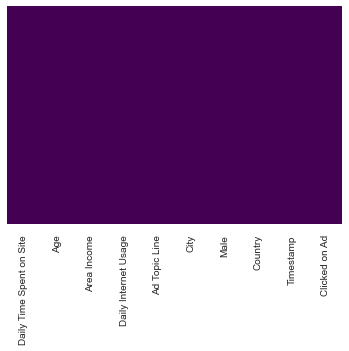

In [18]:
# Visualize missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

No nulls. Cool !

Text(0.5, 0, 'Age')

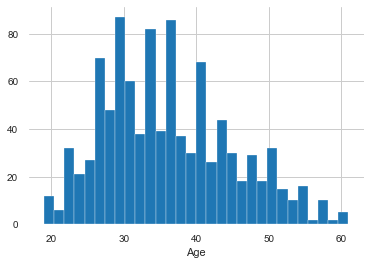

In [19]:
# Lets see whether how every generation behaves with these features
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

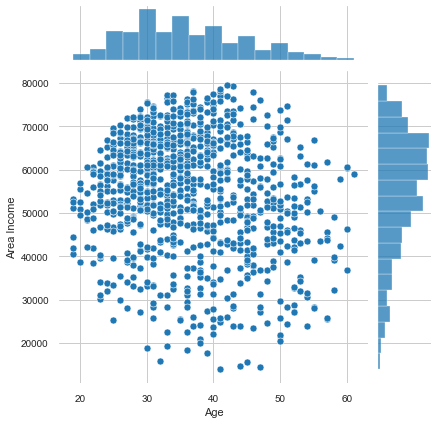

In [20]:
sns.jointplot(x='Age', y='Area Income', data=df)

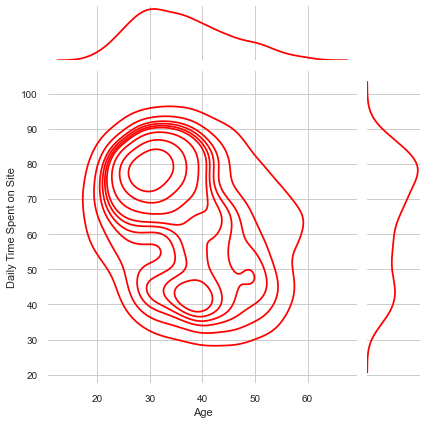

In [21]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df,kind='kde', color='red')

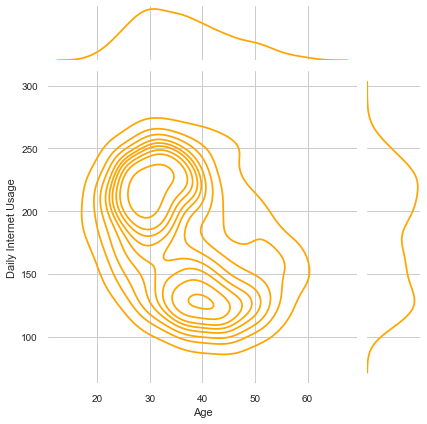

In [22]:
sns.jointplot(x='Age', y='Daily Internet Usage', data=df,kind='kde', color='orange')

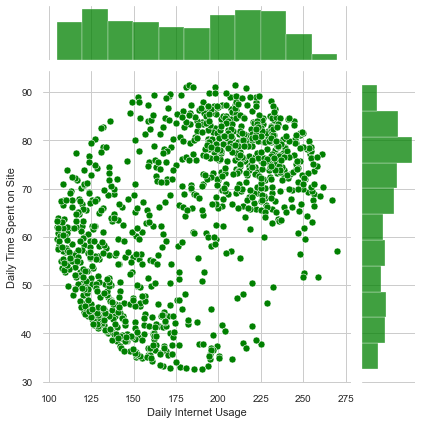

In [23]:
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=df, color='green')

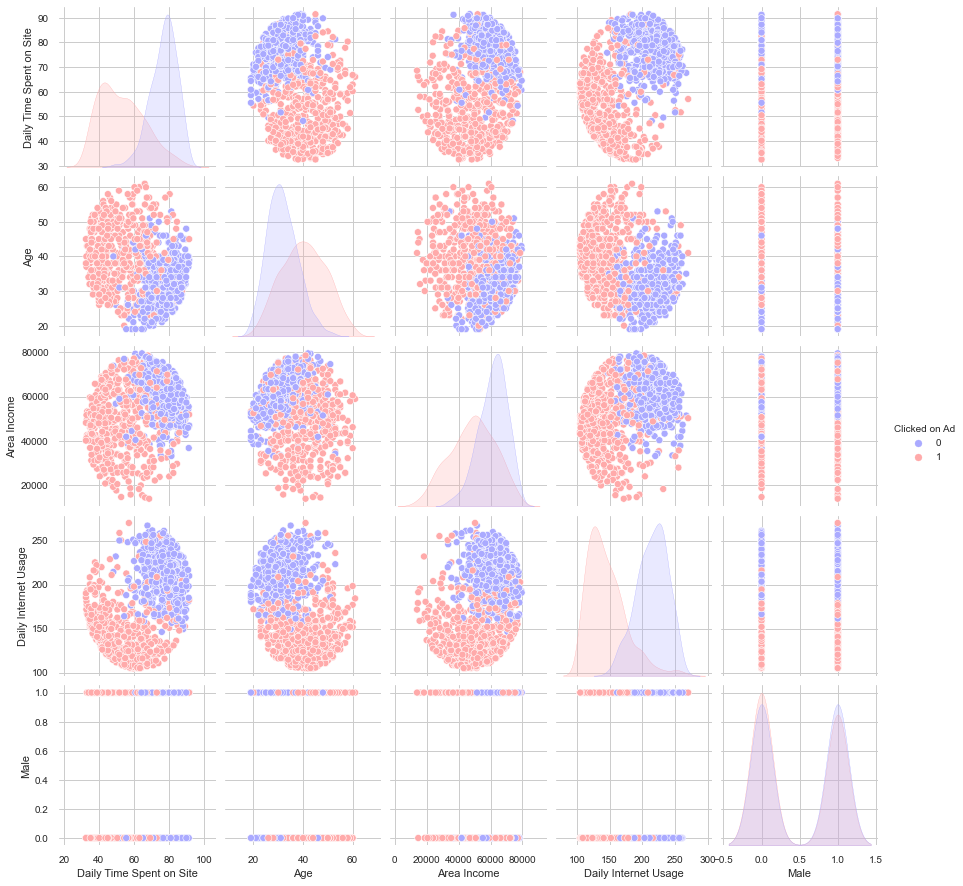

In [24]:
sns.pairplot(data=df, hue='Clicked on Ad', palette='bwr')

Our features of interest are daily time spent on site, internet usage, age and area income, based on the pair plot

### Logistic Regression - Training model

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['Clicked on Ad'], test_size=0.3, random_state=123)

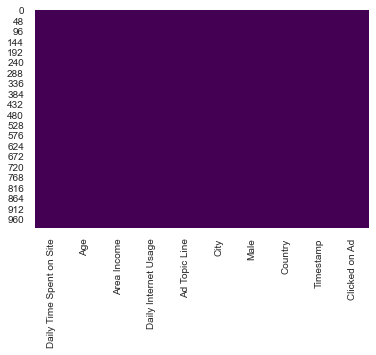

In [28]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') # No missing values

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train & fit a logistic regression model on the training set
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

# Predictions & Evaluations on testing data
predictions = logmodel.predict(X_test)
#pred_prob = logmodel.predict_proba(X_test)
#print(pred_prob)

# Create a classification report of the models
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       153
           1       0.92      0.86      0.89       147

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



C:\Users\Ayush\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
# Scoring the whole data
print(logmodel.predict_proba(df[cols]))
scores = logmodel.predict_proba(df[cols])
for i in scores:
    df['model_p0_score'] = i[0]
    df['model_p1_score'] = i[1]

df.to_csv('advertising_scored.csv')

[[8.64072820e-01 1.35927180e-01]
 [9.49381703e-01 5.06182968e-02]
 [9.83062033e-01 1.69379673e-02]
 ...
 [7.11297447e-04 9.99288703e-01]
 [9.73263696e-01 2.67363037e-02]
 [5.36807070e-01 4.63192930e-01]]


In [37]:
df.head() # seems that threshold is 0.5

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,model_p0_score,model_p1_score
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0.536807,0.463193
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0.536807,0.463193
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0.536807,0.463193
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0.536807,0.463193
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0.536807,0.463193


In [40]:
import pickle as pkl
filename='advertising_mdl.sav'
pkl.dump(logmodel, open(filename, 'wb'))
# Saves the pickled model right back to the same local location

In [42]:
#load the model
loaded_model=pkl.load(open(filename, 'rb'))

print(classification_report(y_test, loaded_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       153
           1       0.92      0.86      0.89       147

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [ ]:
# END